In [1]:
from PIL import Image
from PIL import Image, ImageFilter
from PIL import Image, ImageEnhance
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.image as ig
from matplotlib import pyplot as plt
from __future__ import absolute_import, division, print_function
from collections import Counter
from PIL import Image
from collections import Counter
import io

In [2]:
import pandas as pd
import os
def get_csv_data(video_folder_name, fileName):    
    data = pd.read_csv(fileName, sep=';')
    data.columns = ['ID', 'file_name', 'cut_frame']
    file_paths = []
    for entry in data.iloc():
        file_paths.append(video_folder_name + entry['file_name'])
    data['file_path'] = file_paths
    data.set_index('ID', inplace=True, drop=True)
#     data["cut_frame"] = pd.to_numeric(data["cut_frame"])
    return data


def get_videos_from_folder(video_folder_name):
    video_files = []
    for root, dirs, files in os.walk(video_folder_name):
        for filename in files:
            if '.mp4' in filename:
                video_files.append({"file_name": filename, "file_path": video_folder_name + filename})
    data = pd.DataFrame(video_files, columns=['file_name', 'file_path'])
    return data

test = get_csv_data('../WS2020_DeepLearning_Videos/Task2_Test/', '../Task2_Test.csv')

test.dropna(inplace=True)
display(test)

file_name  cut_frame  \
ID                                     
1   _tigfCJFLZg_00293.mp4      131.0   
2   _tigfCJFLZg_00295.mp4       85.0   
3   _tigfCJFLZg_00298.mp4       93.0   
4   _tigfCJFLZg_00299.mp4      138.0   
5   _tigfCJFLZg_00301.mp4      124.0   
..                    ...        ...   
86  _tigfCJFLZg_00428.mp4       45.0   
87  _tigfCJFLZg_00429.mp4      125.0   
88  _tigfCJFLZg_00430.mp4       49.0   
91  _tigfCJFLZg_00435.mp4       44.0   
92  _tigfCJFLZg_00436.mp4      115.0   

                                            file_path  
ID                                                     
1   ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
2   ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
3   ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
4   ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
5   ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
..                                                ...  
86  ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
87  ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
88  ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
91  ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  
92  ../WS2020_DeepLearning_Videos/Task2_Test/_tigf...  

[87 rows x 3 columns]

In [3]:
import cv2
import numpy as np
import math

class_names = ['wet', 'dry']
from scipy.ndimage import rotate


def get_label_for_frame(frame_number, cut_frame):
    if(frame_number >= cut_frame):
        return 0
    else:
        return 1   
    
def get_frames_labels(data):
    frames = []
    labels = []
    videos = []
    
    for file in data.iloc():
        file_path = file['file_path']
        cutframe = file['cut_frame']
        file_name = file['file_name']
        
        # Playing video from file:
        cap = cv2.VideoCapture(file['file_path'])
        totalFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        currentFrame = 0
        success, frame = cap.read()
        

        while(success):
            
            label = get_label_for_frame(currentFrame, cutframe)
            
            
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
           # frame = cv2.resize(frame, (256,256))
           
                
            videos.append(file_name)  
            frames.append(frame)
            labels.append(label)

            currentFrame += 1
            success, frame = cap.read()
            
        cap.release()
        cv2.destroyAllWindows()
    
    return (frames, labels, videos)

test_frames, test_labels, test_video= get_frames_labels(test)

print(test_video[1])


_tigfCJFLZg_00293.mp4


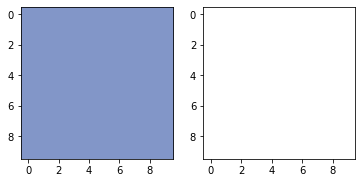

_tigfCJFLZg_00295.mp4


In [29]:
light_white = (130, 150, 200)
#hellblau = (170,230,230)
dark_white = (255, 255, 255)


lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
#hellblau = np.full((10, 10, 3), hellblau, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0


plt.subplot(1, 2, 1)
plt.imshow(lw_square)

plt.subplot(1, 2, 2)
plt.imshow(dw_square)
plt.show()
print(test_video[176])

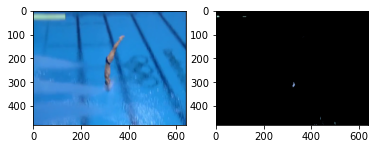

801


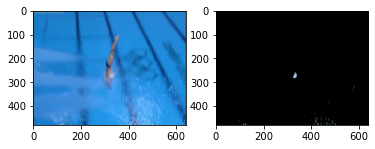

1665


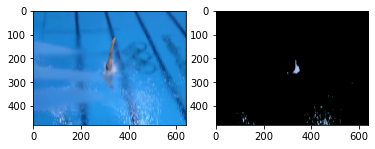

5535


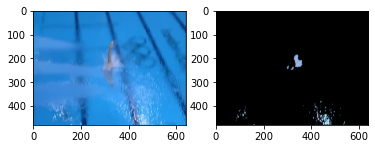

9546


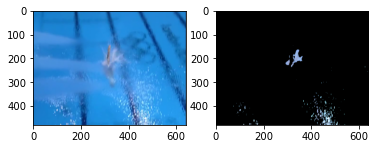

12342


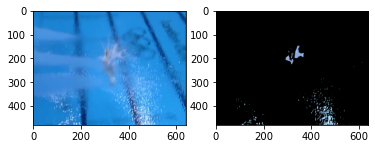

13809


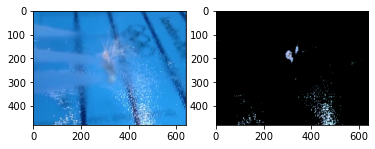

15618


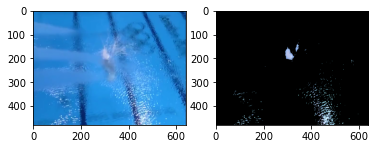

15879


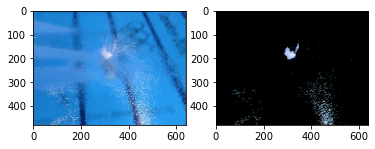

16971


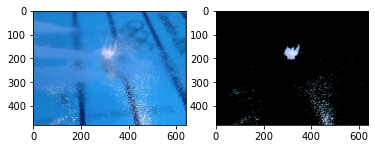

17874


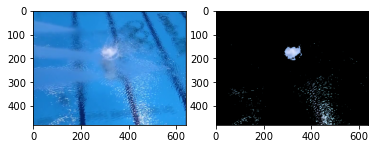

19134


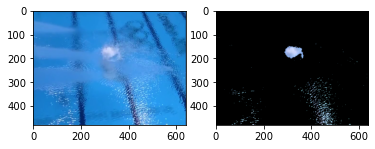

18843


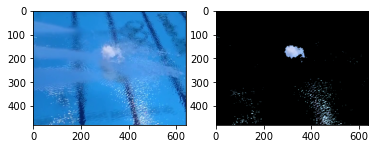

20511


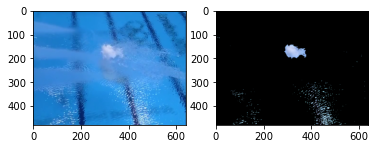

20091


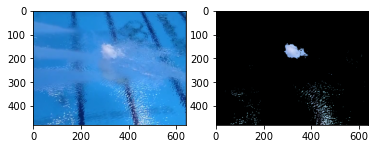

20367


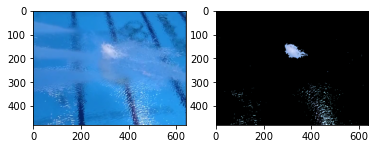

18618


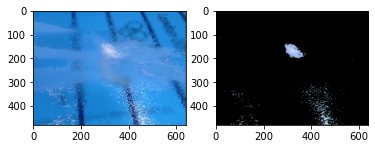

18156


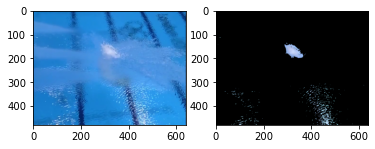

16896


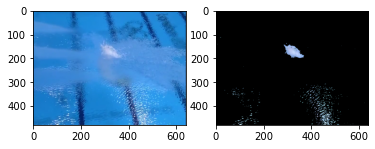

17139


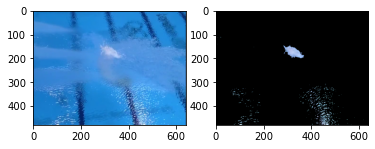

15246


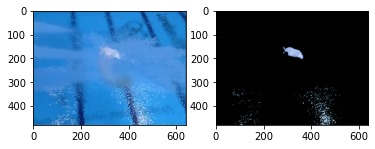

15360


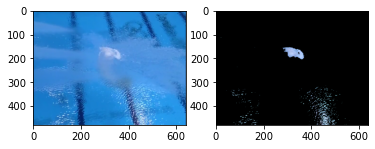

16557


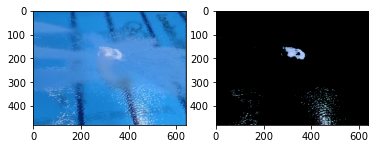

17769


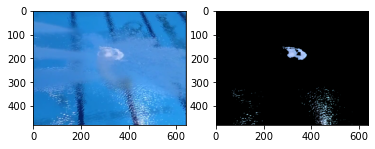

17535


In [26]:
result=[]
orgresult=[]
for i in range(0,len(test_frames)):
        if(test_labels[i]==0):
            if(test_video[i] == test_video[176]):
                
                img = test_frames[i]
                plt.subplot(1, 2, 1)
                plt.imshow(img)
                
                mask_white = cv2.inRange(img, light_white, dark_white)
                result_white = cv2.bitwise_and(img, img, mask=mask_white)
                plt.subplot(1, 2, 2)
                plt.imshow(result_white)
                plt.show()
                orgresult.append(img)
                result.append(result_white)

                #count pixels

                pixel_count = np.sum(result_white != (0,0,0))
                print(pixel_count)



In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def dbscan(X, eps, min_samples):
    #ss = StandardScaler()
    #Xi = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = db.fit_predict(X)
#     plt.gca().invert_yaxis()
#     plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='plasma')
#     plt.title("DBSCAN")
#     plt.show()
    labels=db.labels_
    #print(X)
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    
    #print("NUMBER OF CLUSTERS:",n_clusters_)
    #print("NUMBER OF NOISES:",n_noise_)
    #print(labels)

    counts = np.bincount(labels[labels>=0])
    #print(counts)
    labels1 = np.unique(labels[labels>=0])
    max1 = labels1[np.argsort(-counts)[:1]]
    #print(max1)
    cluster = np.array(X[labels == max1])
    df=pd.DataFrame(cluster,columns= ["X", "Y"])
    
    
    return df,counts

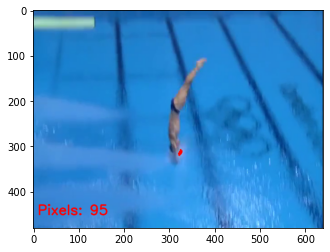

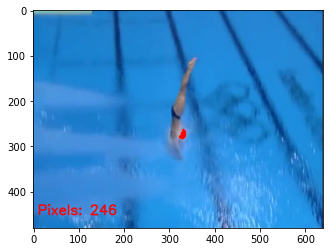

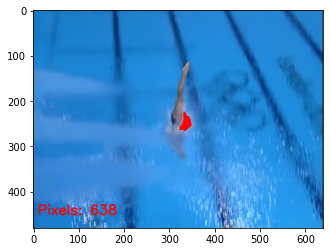

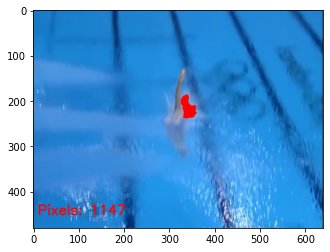

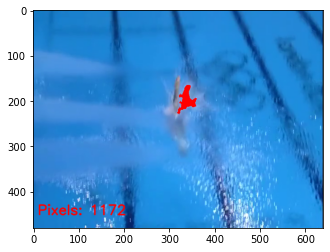

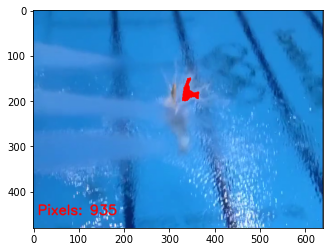

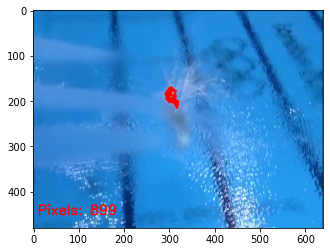

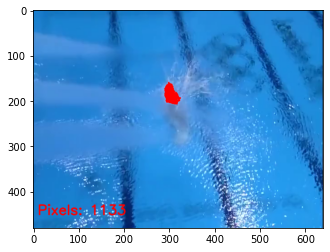

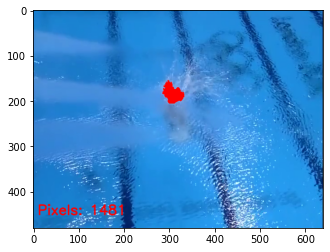

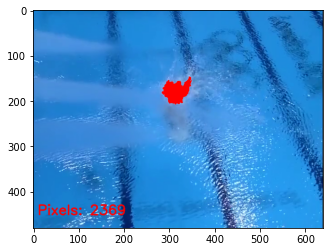

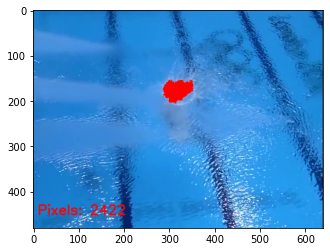

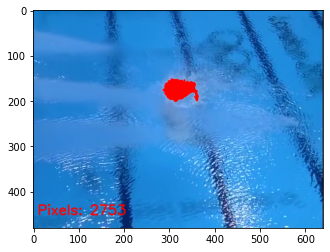

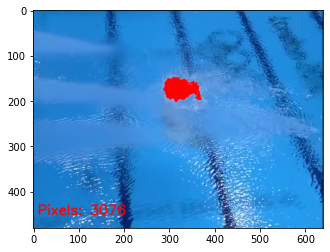

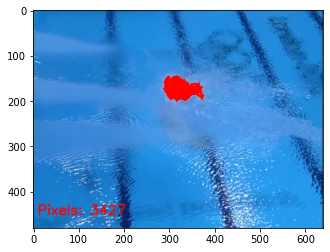

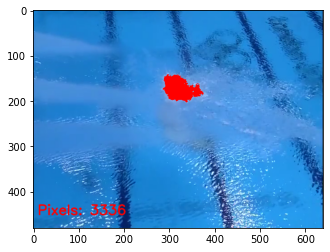

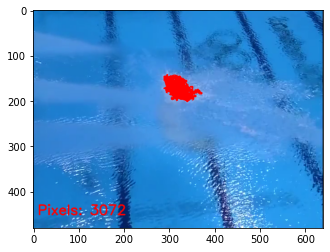

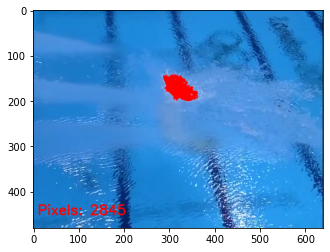

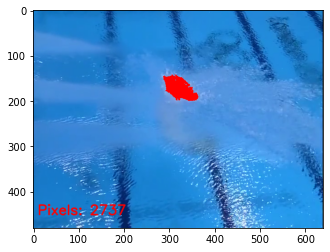

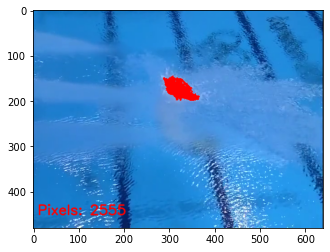

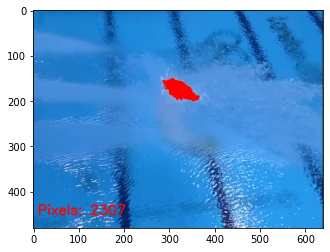

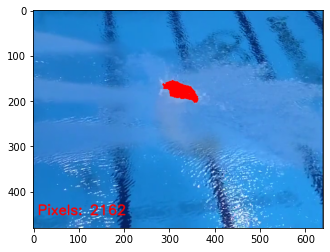

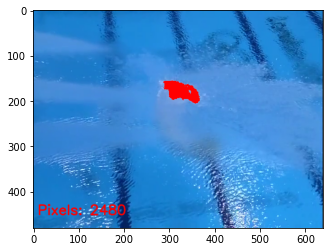

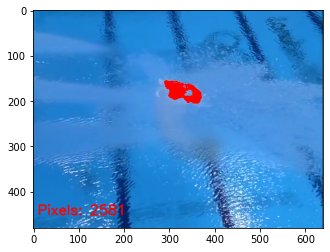

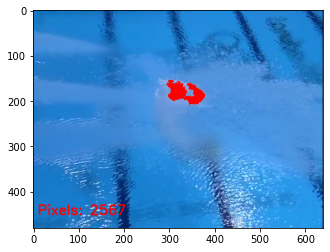

framezahl 24


In [27]:
from matplotlib.backends.backend_qt4agg import FigureCanvas

my_sorted_coord=[]
allmanipulated =[]
zahl = 0
for i in range (len(result)): 
    frame = result[i]
    orgframe= np.copy(orgresult[i])
    
    indices = np.where(frame!= (0,0,0))
    my_coords = []
    #print(indices)
    for  i in range(1,len(indices[0])): 
        x = indices[1][i]
        y = indices[0][i]
    
        my_coords.append((x,y))
       
    unique_coordinates = list(set(list(my_coords)))
    sorted_=sorted(unique_coordinates)
    #print(sorted_)
    
        
    df,counts =dbscan(np.array(sorted_),eps=4, min_samples=40)
    for coord in df.iloc(): 
        x= coord.X
        y=coord.Y
        orgframe[y,x]= [255,0,0]
        
        
       #print(orgframe)
    cv2.putText(orgframe,f"Pixels: {str(counts.max())}",(10,450), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    allmanipulated.append(orgframe)
    plt.imshow(orgframe)
    plt.show()
    zahl = zahl +1
print(f"framezahl {zahl}")

#Video 295 -> test_video[176]


    
    

In [30]:
#out = cv2.VideoWriter("sportvideo.mp4")



img_array = np.array(allmanipulated)

print(allmanipulated)


out = cv2.VideoWriter('video.avi',0,8,(640,480))
 
for i in range(len(img_array)):
    

    out.write(cv2.cvtColor(img_array[i], cv2.COLOR_BGR2RGB))
out.release()


[array([[[ 43, 103, 167],
        [ 43, 103, 167],
        [ 43, 103, 167],
        ...,
        [ 34, 106, 184],
        [ 46, 108, 158],
        [  0,  32,  82]],

       [[ 43, 103, 167],
        [ 43, 103, 167],
        [ 43, 103, 167],
        ...,
        [ 34, 106, 184],
        [ 46, 108, 158],
        [  0,  32,  82]],

       [[ 43, 103, 169],
        [ 43, 103, 169],
        [ 43, 103, 169],
        ...,
        [ 35, 107, 185],
        [ 47, 109, 159],
        [  0,  34,  84]],

       ...,

       [[ 40, 116, 191],
        [ 40, 116, 191],
        [ 41, 117, 192],
        ...,
        [  6,  79, 155],
        [ 14,  77, 138],
        [  0,  27,  88]],

       [[ 38, 116, 192],
        [ 37, 115, 191],
        [ 40, 118, 194],
        ...,
        [  6,  78, 154],
        [ 16,  76, 138],
        [  0,  26,  88]],

       [[ 36, 114, 190],
        [ 36, 114, 190],
        [ 38, 116, 192],
        ...,
        [  5,  77, 153],
        [ 16,  76, 138],
        [  0,  27,  89]